# Pré-processamento

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
passageiros = pd.read_csv('passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [25]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

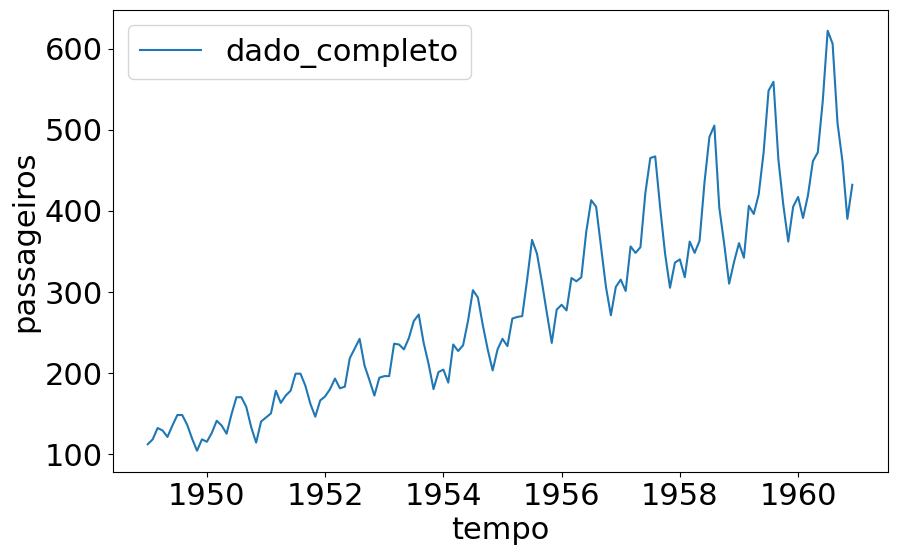

In [26]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [27]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [28]:
dado_escalado = sc.transform(passageiros)

In [29]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<Axes: xlabel='data', ylabel='passageiros'>

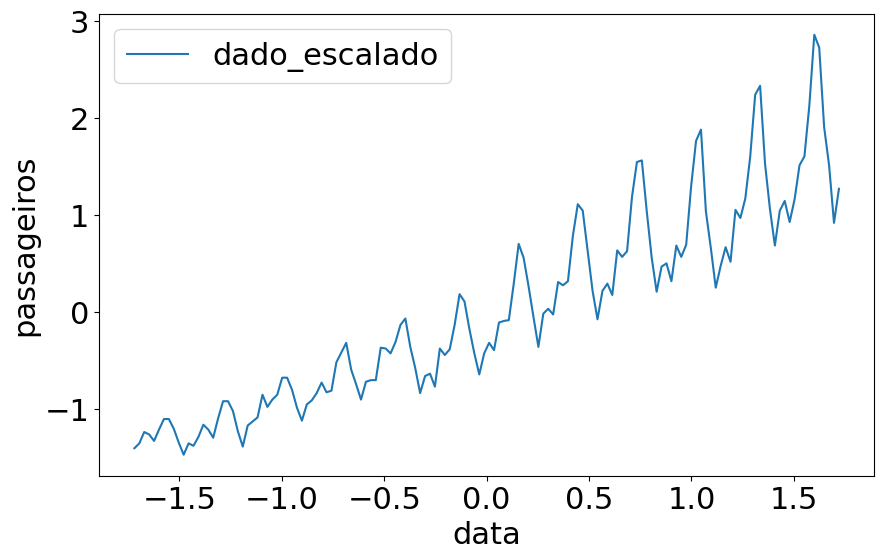

In [30]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [31]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [32]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [33]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

<Axes: xlabel='data', ylabel='passageiros'>

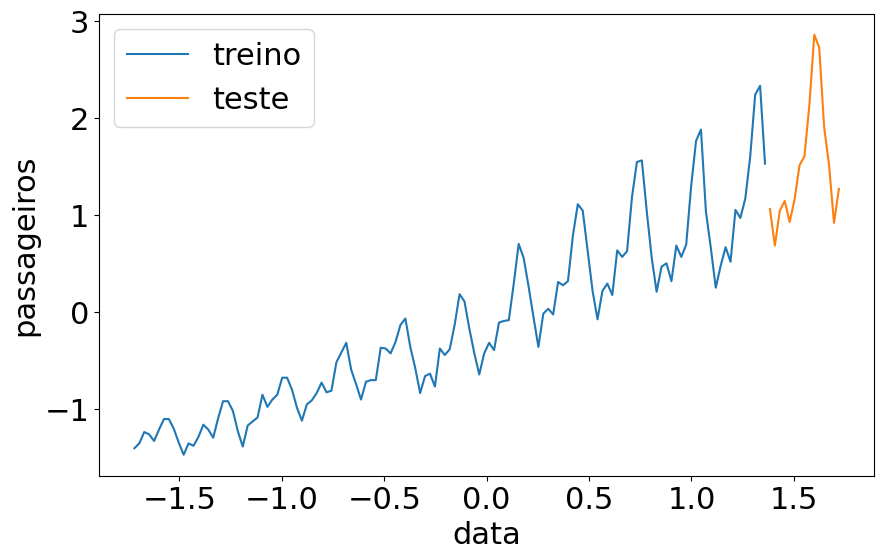

In [36]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')

# 02.Regressão

$ z = Wx + b $

$ a(z) = Cz $

In [52]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
regressor.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.1166


In [56]:
y_predict = regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: >

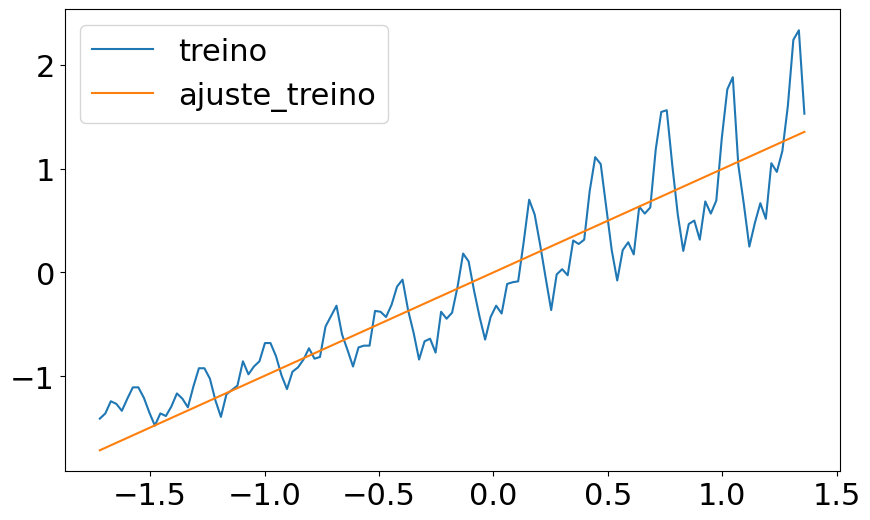

In [57]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')

In [58]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}

In [60]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.712432
1,-1.696007,-1.688482
2,-1.671950,-1.664532
3,-1.647894,-1.640582
4,-1.623837,-1.616632
...,...,...
124,1.262984,1.257380
125,1.287041,1.281330
126,1.311098,1.305280
127,1.335155,1.329230


In [61]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

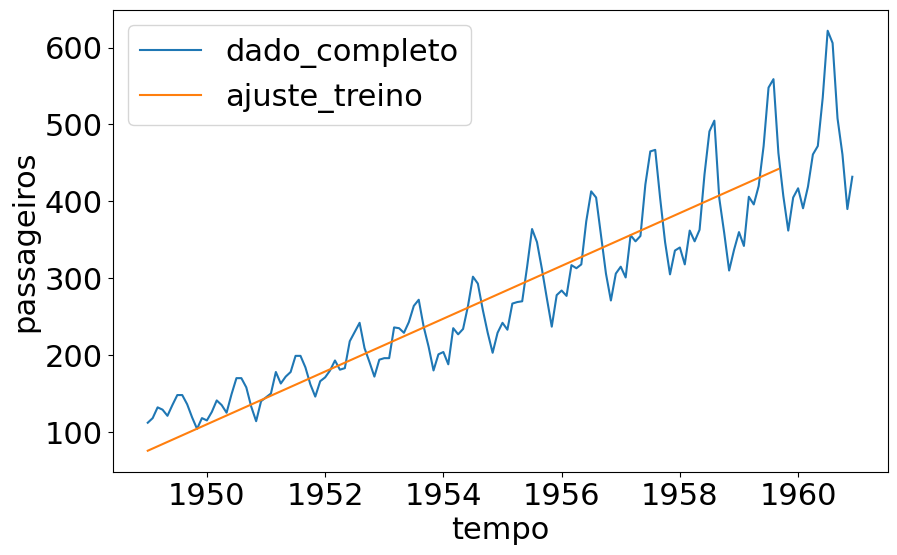

In [62]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [63]:
y_predict_teste = regressor.predict(x_teste)
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

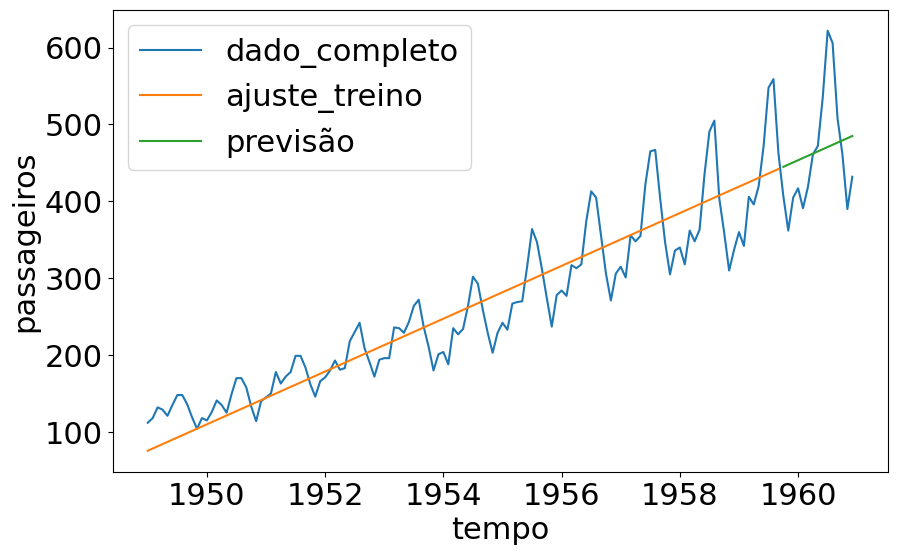

In [64]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [69]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.7010
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6848 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.6952
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.6439
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.6217
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.7152
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.6182
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.6209
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6643 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.6230
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.5964
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.6897
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.6373
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.6728
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.6143
Epoch 

In [74]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<Axes: >

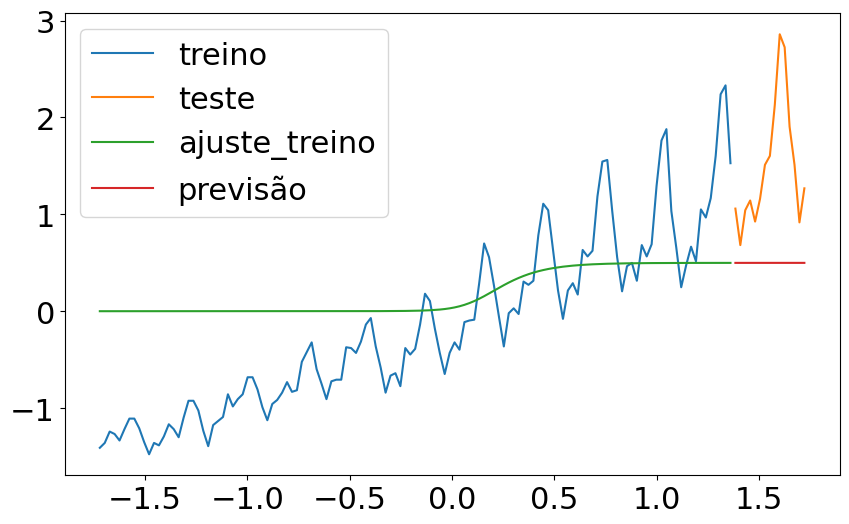

In [75]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsão')

$\Huge \sigma(z) = \frac{1}{1+e^{-z}} $

## Atualização do pesos

No vídeo anterior utilizamos o otimizador Adam para ser responsável pela atualização dos pesos. Este algoritmo é exemplo de um método de gradiente descendente estocástico desenvolvido para ser computacionalmente eficiente.
[Neste texto](https://cursos.alura.com.br/course/rede-neural-numpy/task/57827) eu explico como um algoritmo de gradiente descendente simples funciona.

Em conjunto com o algoritmo de otimização precisamos utilizar uma função de custo que vai medir quanto a nossa estimativa é diferente do valor conhecido. O algoritmo de otimização busca minimizar o valor da função de custo. No problema estudado no curso estamos estimando o número de passageiros. Para minimizar a função de custo, o número de passageiros estimado deve ser o mais próximo possível do número de passageiros presentes nos dados de treino.

[Neste link](https://www.tensorflow.org/api_docs/python/tf/keras/losses) você encontra diferentes funções de custo presentes no Keras. A função de custo de erro médio quadrático é uma das que é adequada para problemas de regressão.